In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mlp-term-3-2025-kaggle-assignment-1/sample_submission.csv
/kaggle/input/mlp-term-3-2025-kaggle-assignment-1/train.csv
/kaggle/input/mlp-term-3-2025-kaggle-assignment-1/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Load data
train = pd.read_csv("/kaggle/input/mlp-term-3-2025-kaggle-assignment-1/train.csv")   # Replace with your path
test = pd.read_csv("/kaggle/input/mlp-term-3-2025-kaggle-assignment-1/test.csv")


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Load data
train = pd.read_csv("/kaggle/input/mlp-term-3-2025-kaggle-assignment-1/train.csv")   # Replace with your path
test = pd.read_csv("/kaggle/input/mlp-term-3-2025-kaggle-assignment-1/test.csv")


In [4]:
train.dtypes

id                int64
area_type        object
availability     object
location         object
size             object
total_sqft      float64
bath            float64
balcony         float64
price           float64
dtype: object

In [5]:
test.dtypes

id                int64
area_type        object
availability     object
location         object
size             object
total_sqft      float64
bath            float64
balcony         float64
dtype: object

In [6]:
train.describe()

,id,total_sqft,bath,balcony,price
count,10000.00000,9967.000000,9936.000000,9525.000000,10000.000000
mean,4999.50000,1570.095822,2.692029,1.585302,113.275879
std,2886.89568,1302.566836,1.274172,0.814347,151.802643
min,0.00000,1.000000,1.000000,0.000000,8.000000
25%,2499.75000,1100.000000,2.000000,1.000000,50.000000
50%,4999.50000,1279.000000,2.000000,2.000000,72.000000
75%,7499.25000,1682.500000,3.000000,2.000000,120.000000
max,9999.00000,52272.000000,18.000000,3.000000,3600.000000


In [7]:
test.describe()

,id,total_sqft,bath,balcony
count,3320.000000,3307.000000,3311.000000,3186.000000
mean,1659.500000,1528.073686,2.694352,1.581607
std,958.545774,1020.450754,1.525878,0.826044
min,0.000000,5.000000,1.000000,0.000000
25%,829.750000,1100.000000,2.000000,1.000000
50%,1659.500000,1270.000000,2.000000,2.000000
75%,2489.250000,1660.000000,3.000000,2.000000
max,3319.000000,30400.000000,40.000000,3.000000


In [8]:
train.isnull().sum()

id                0
area_type         0
availability      0
location          1
size             13
total_sqft       33
bath             64
balcony         475
price             0
dtype: int64

In [9]:
test.isnull().sum()

id                0
area_type         0
availability      0
location          0
size              3
total_sqft       13
bath              9
balcony         134
dtype: int64

In [10]:
from sklearn.impute import SimpleImputer


num_cols = ['total_sqft', 'bath', 'balcony']
cat_cols = ['location', 'size', 'area_type', 'availability']

# ---- For Numerical Columns ----
num_imputer = SimpleImputer(strategy='median')
train[num_cols] = num_imputer.fit_transform(train[num_cols])
test[num_cols] = num_imputer.transform(test[num_cols])

# ---- For Categorical Columns ----
cat_imputer = SimpleImputer(strategy='most_frequent')
train[cat_cols] = cat_imputer.fit_transform(train[cat_cols])
test[cat_cols] = cat_imputer.transform(test[cat_cols])

In [11]:
train.isnull().sum()

id              0
area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [12]:
test.isnull().sum()

id              0
area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
dtype: int64

In [13]:
train.duplicated().sum()

0

In [14]:
test.duplicated().sum()

0

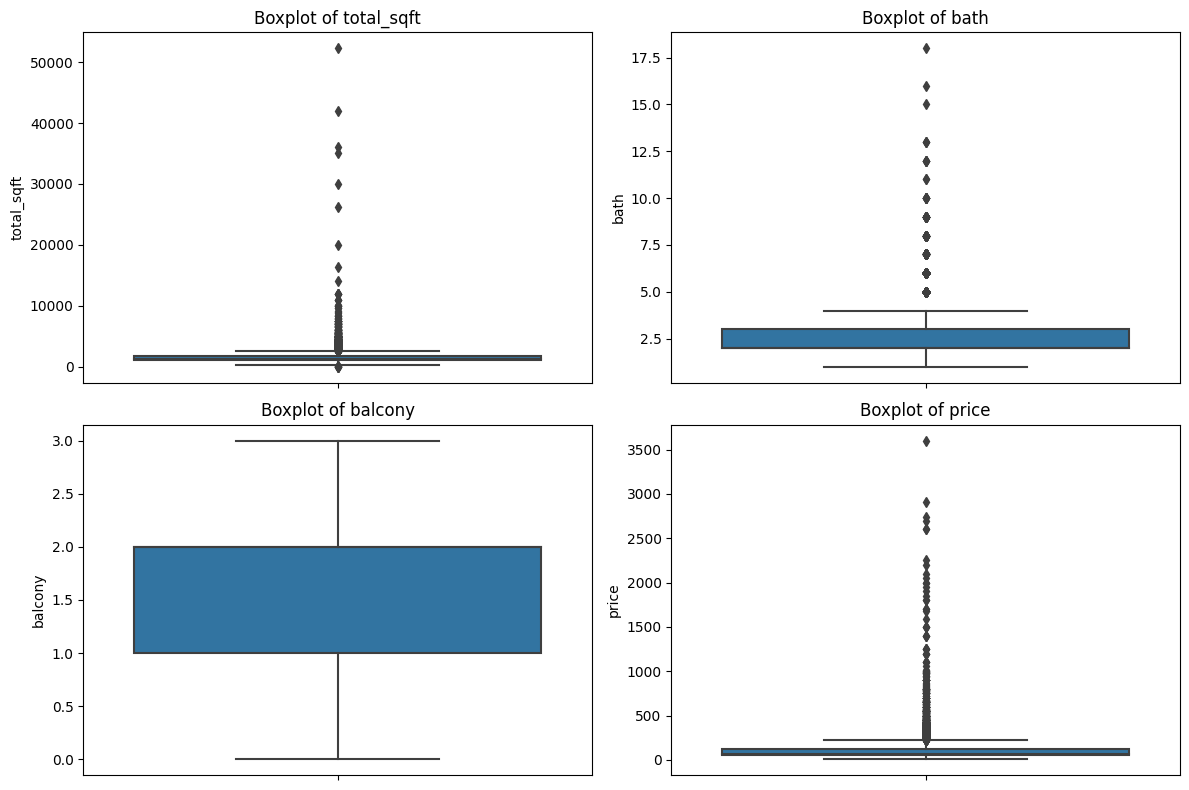

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['total_sqft', 'bath', 'balcony', 'price']

plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=train[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Example results from cross-validation (replace with your own RMSE values)
results = {
    "Linear Regression": 0.254,
    "Random Forest": 0.182,
    "XGBoost": 0.176
}

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}


In [17]:
# =========================================================
# ✅ FINAL: Fully working submission block with preprocessing
# Handles numeric + categorical columns automatically
# =========================================================

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# --- Step 1: Load your data ---
train = pd.read_csv("/kaggle/input/mlp-term-3-2025-kaggle-assignment-1/train.csv")
test = pd.read_csv("/kaggle/input/mlp-term-3-2025-kaggle-assignment-1/test.csv")

# --- Step 2: Identify columns ---
target_col = "price"
id_col = "id"

X = train.drop(columns=[target_col, id_col], errors="ignore")
y = np.log1p(train[target_col])

# --- Step 3: Identify numeric and categorical columns ---
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# --- Step 4: Preprocessing ---
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# --- Step 5: Full pipeline with model ---
model = LinearRegression()
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# --- Step 6: Train model ---
pipeline.fit(X, y)

# --- Step 7: Predict on test data ---
X_test = test.drop(columns=[id_col], errors="ignore")
preds = np.expm1(pipeline.predict(X_test))

# --- Step 8: Create submission file ---
submission = pd.DataFrame({
    id_col: test[id_col],
    target_col: preds
})

# --- Step 9: Save submission file ---
submission.to_csv("/kaggle/working/submission.csv", index=False)
print("✅ submission.csv successfully created at /kaggle/working/submission.csv!")

submission.head()

✅ submission.csv successfully created at /kaggle/working/submission.csv!


,id,price
0,0,50.056690
1,1,92.194882
2,2,71.557505
3,3,112.026577
4,4,143.910697
